In [0]:
import pandas as pd
import numpy as np
df=pd.read_csv('https://raw.githubusercontent.com/trong-shen/Python/master/train.csv')

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df.info()

#drop the PassengerID column
df.drop('PassengerId',axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
#Change varaibles to categories
df.Survived=df.Survived.astype('category')
df.Pclass=df.Pclass.astype('category')
df.Sex=df.Sex.astype('category')
df.SibSp=df.SibSp.astype('category')
df.Parch=df.Parch.astype('category')
df.Embarked=df.Embarked.astype('category')

Question 3: Engineering Attributes by splitting exisitng attributes

In [0]:
#Separate Name column into "Title", "First Name", "Last Name"
#Separate Ticket column into "Ticket-Letter Code", "Ticket-Numer"
#Separate Cabin Number into Cabin letter (Deck Number) and Number
import re
Name_split=re.compile("[\.,]")
First_Middle=[];
Lastname=[];
Title=[];

Ticket_split=re.compile("\s+")
Ticket_Letter=[];
Ticket_Number=[];

Cabin_name=re.compile("(\d+)")
cabin_letter=[];
cabin_numbers=[];

for i in range(0,len(df)):
  #name split
  name=Name_split.split(df.Name[i]);
  Lastname.append(name[0])
  Title.append(name[1][1:])
  First_Middle.append(name[2])
  #ticket split
  ticket=Ticket_split.split(df.Ticket[i])
  if len(ticket)>1:
    Ticket_Letter.append(ticket[0])
    Ticket_Number.append(ticket[1])
  else:
    Ticket_Letter.append(float('nan'))
    Ticket_Number.append(ticket[0])
  #cabin number split
  if type(df.Cabin[i])==float:
    cabin_letter.append(float('nan'))
    cabin_numbers.append(float('nan'))
    continue
  cabin=Cabin_name.split(df.Cabin[i])
  cabin_letter.append(cabin[0])
  cabin_number_sub_list=[];
  for j in range(0,len(cabin)):
    try:
      num=float(cabin[j])
    except ValueError:
      continue
    else:
      cabin_number_sub_list.append(cabin[j])
  cabin_numbers.append(cabin_number_sub_list)
#Add the columns into the df
df.insert(3,'Title',Title);
df.insert(4,'First_Middle Name',First_Middle);
df.insert(5,'Last_Name',Lastname);
df.insert(11,'Ticket_Letter_Code',Ticket_Letter);
df.insert(12,'Ticket_Number',Ticket_Number);
df.insert(14,'Cabin_Letter',cabin_letter)
df.insert(15,'Cabin_Number',cabin_numbers)

#Drop the Name and Ticket columns
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
df.drop('Cabin', axis=1,inplace=True)
df.head()

#Redefine Cabin_Letter as a category
df.Cabin_Letter=df.Cabin_Letter.astype('category')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

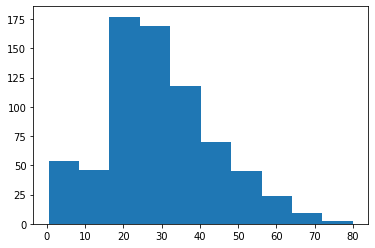

In [0]:
import matplotlib.pyplot as plt
plt.hist(df['Age'])

In [0]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**Question 4**

There is 177 ages missing.
Trying to extrapolate using the following strategy:
*   Define the median age of boys with title master. Fill in the median age for any missing age in this group
* For men with a Mister title(adult men), use the median age to fill in the rest  
* For women, based on their title/martial status (Miss vs Mrs), fill in with the median age of Miss vs Mrs. 
* For Dr. replacing the missing doctor's age with the median.



In [0]:
#Find the median age of all rows with title master
master_median=df[df['Title']=='Master'].Age.median()
#Repalce Master with age Nan with Median
Nan_Age=df.Age.isnull()
Master_title=(df.Title=='Master')
df.loc[Nan_Age & Master_title,'Age']=master_median

#Find All rows with title Mr
mister_median=df[df.Title=='Mr'].Age.median()
#Replace Mister with age Nan with Median
Mr_title=(df.Title=='Mr')
df.loc[Nan_Age & Mr_title, 'Age']=mister_median

#Find All rows with title Miss
miss_median=df[df.Title=='Miss'].Age.median()
#Replace Mister with age Nan with Median
Miss_title=(df.Title=='Miss')
df.loc[Nan_Age & Miss_title, 'Age']=miss_median

#Find All rows with title Mrs
mrs_median=df[df.Title=='Mrs'].Age.median()
#Replace Mister with age Nan with Median
Mrs_title=(df.Title=='Mrs')
df.loc[Nan_Age & Mrs_title, 'Age']=mrs_median

#Find All rows with title Doctor
dr_median=df[df.Title=='Dr'].Age.median()
#Replace Mister with age Nan with Median
Dr_title=(df.Title=='Dr')
df.loc[Nan_Age & Dr_title, 'Age']=dr_median


There are two embarked entries missing. Fill in the empty embarked fields with the mode of the whole data frame

In [0]:
import statistics as stat
embarked_mode=stat.mode(df.Embarked)
Nan_Embarked=df.Embarked.isnull()
df.loc[Nan_Embarked,'Embarked']=embarked_mode;
print(embarked_mode)
#shows that there are no more missing data
df.info()
df.head()

S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
Survived              891 non-null category
Pclass                891 non-null category
Title                 891 non-null object
First_Middle Name     891 non-null object
Last_Name             891 non-null object
Sex                   891 non-null category
Age                   891 non-null float64
Age_Group             891 non-null category
SibSp                 891 non-null category
Parch                 891 non-null category
Ticket_Letter_Code    226 non-null object
Ticket_Number         891 non-null object
Fare                  891 non-null float64
Fare_Group            891 non-null category
Cabin_Letter          204 non-null category
Cabin_Number          204 non-null object
Embarked              891 non-null category
dtypes: category(9), float64(2), object(6)
memory usage: 65.5+ KB


,Survived,Pclass,Title,First_Middle Name,Last_Name,Sex,Age,Age_Group,SibSp,Parch,Ticket_Letter_Code,Ticket_Number,Fare,Fare_Group,Cabin_Letter,Cabin_Number,Embarked
0,0,3,Mr,Owen Harris,Braund,male,22.0,Young Adults,1,0,A/5,21171,7.2500,<=$7.9,NaN,NaN,S
1,1,1,Mrs,John Bradley (Florence Briggs Thayer),Cumings,female,38.0,Middle-Age,1,0,PC,17599,71.2833,>$31,C,[85],C
2,1,3,Miss,Laina,Heikkinen,female,26.0,Young Adults,0,0,STON/O2.,3101282,7.9250,"($7.9,$14.5]",NaN,NaN,S
3,1,1,Mrs,Jacques Heath (Lily May Peel),Futrelle,female,35.0,Young Adults,1,0,NaN,113803,53.1000,>$31,C,[123],S
4,0,3,Mr,William Henry,Allen,male,35.0,Young Adults,0,0,NaN,373450,8.0500,"($7.9,$14.5]",NaN,NaN,S


## Question 3 Engineering two more attirubtes: age groups and fare groups

In [0]:
#Engineering age_group
age_group=[];

for x in range(0,len(df)):
  if df.Age[x]<=12:
    age_group.append("Minors")
  elif df.Age[x]<=17:
    age_group.append("Teenager")
  elif df.Age[x]<=35:
    age_group.append("Young Adults")
  elif df.Age[x]<=65:
    age_group.append("Middle-Age")
  else:
    age_group.append("Seniors")

#Looking at the quartiles for Fare
print(df.Fare.describe())
#Engineering fare_groups using the four quartiles
fare_group=[];
for x in range(0,len(df)):
  if df.Fare[x]<=7.9:
    fare_group.append("<=$7.9")
  elif df.Fare[x]<=14.5:
    fare_group.append("($7.9,$14.5]")
  elif df.Fare[x]<=31:
    fare_group.append("($14.5, $31]")
  else:
    fare_group.append(">$31")

df.insert(7,'Age_Group',age_group)
df.insert(13,'Fare_Group',fare_group)
df.head()

# Change the two new columns as cateogrical
df.Age_Group=df.Age_Group.astype('category')
df.Fare_Group=df.Fare_Group.astype('category')


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


ValueError: ignored

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
Survived              891 non-null category
Pclass                891 non-null category
Title                 891 non-null object
First_Middle Name     891 non-null object
Last_Name             891 non-null object
Sex                   891 non-null category
Age                   891 non-null float64
Age_Group             891 non-null category
SibSp                 891 non-null category
Parch                 891 non-null category
Ticket_Letter_Code    226 non-null object
Ticket_Number         891 non-null object
Fare                  891 non-null float64
Fare_Group            891 non-null category
Cabin_Letter          204 non-null category
Cabin_Number          204 non-null object
Embarked              891 non-null category
dtypes: category(9), float64(2), object(6)
memory usage: 65.5+ KB


Now that the attributes have been engineered and the missing vcalues have been filled in. It's time to do determine which groups are more likely to survive titanic.

THe following is for **Question 1 and Question 2**

In [0]:
print(pd.crosstab(df.Sex,df.Survived,margins=True))
print('Male survival rate is',round((109/577),3))
print('Female survival rate is',round((233/314),3))
print('All gender survival rate is',round((342/891),3))

Survived    0    1  All
Sex                    
female     81  233  314
male      468  109  577
All       549  342  891
Male survival rate is 0.189
Female survival rate is 0.742
All gender survival rate is 0.384


In [0]:
print(pd.crosstab(df.Pclass,df.Survived,margins=True))
print('Class 1 survival rate is',round((136/216),3))
print('Class 2 survival rate is',round((87/184),3))
print('Class 3 survival rate is',round((119/491),3))
print('All class survival rate is',round((342/891),3))


Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891
Class 1 survival rate is 0.63
Class 2 survival rate is 0.473
Class 3 survival rate is 0.242
All class survival rate is 0.384


In [0]:
print(pd.crosstab(df.SibSp,df.Survived,margins=True))
print('0 Sibling/Spouse survival rate is',round((210/608),3))
print('1 Sibling/Spouse survival rate is',round((112/209),3))
print('2 Sibling/Spouse survival rate is',round((13/28),3))
print('3 Sibling/Spouse survival rate is',round((4/16),3))
print('Overall survival rate is',round((342/891),3))

Survived    0    1  All
SibSp                  
0         398  210  608
1          97  112  209
2          15   13   28
3          12    4   16
4          15    3   18
5           5    0    5
8           7    0    7
All       549  342  891
0 Sibling/Spouse survival rate is 0.345
1 Sibling/Spouse survival rate is 0.536
2 Sibling/Spouse survival rate is 0.464
3 Sibling/Spouse survival rate is 0.25
Overall survival rate is 0.384


In [0]:
print(pd.crosstab(df.Parch,df.Survived,margins=True))
print('0 Parent/children survival rate is',round((233/678),3))
print('1 Parent/children survival rate is',round((65/118),3))
print('2 Parent/children survival rate is',round((40/80),3))
print('3 Parent/children survival rate is',round((3/5),3))
print('At least 1 Parent/children survival rate is',round((109/213),3))
print('Overall survival rate is',round((342/891),3))

Survived    0    1  All
Parch                  
0         445  233  678
1          53   65  118
2          40   40   80
3           2    3    5
4           4    0    4
5           4    1    5
6           1    0    1
All       549  342  891
0 Parent/children survival rate is 0.344
1 Parent/children survival rate is 0.551
2 Parent/children survival rate is 0.5
3 Parent/children survival rate is 0.6
At least 1 Parent/children survival rate is 0.512
Overall survival rate is 0.384


In [0]:
print(pd.crosstab(df.Embarked,df.Survived,margins=True))
print("Embarked from Cherbourg survival is",round((93/168),3))
print("Embarked from Queenstown survival is",round((30/77),3))
print("Embarked from Southampton survival is",round((219/646),3))


print(pd.crosstab(df.Embarked,df.Pclass,margins=True))
print("% Class 1 embarked from Cherbourg is",round((85/168),3))
print("% Class 1 embarked from from Queenstown is",round((2/77),3))
print("% Class 1 embarked from Southampton is",round((129/646),3))

Avg_C_Fare=stat.mean(df[df.Embarked=='C'].Fare);
Avg_Q_Fare=stat.mean(df[df.Embarked=='Q'].Fare);
Avg_S_Fare=stat.mean(df[df.Embarked=='S'].Fare);
print("Average_Embarked from Cherbourg Fare is",Avg_C_Fare)
print("Average_Embarked from Queenstown Fare is",Avg_Q_Fare)
print("Average_Embarked from Southampton Fare is",Avg_S_Fare)
print("Average Fare is",stat.mean(df.Fare))

Survived    0    1  All
Embarked               
C          75   93  168
Q          47   30   77
S         427  219  646
All       549  342  891
Embarked from Cherbourg survival is 0.554
Embarked from Queenstown survival is 0.39
Embarked from Southampton survival is 0.339
Pclass      1    2    3  All
Embarked                    
C          85   17   66  168
Q           2    3   72   77
S         129  164  353  646
All       216  184  491  891
% Class 1 embarked from Cherbourg is 0.506
% Class 1 embarked from from Queenstown is 0.026
% Class 1 embarked from Southampton is 0.2
Average_Embarked from Cherbourg Fare is 59.954144047619046
Average_Embarked from Queenstown Fare is 13.27602987012987
Average_Embarked from Southampton Fare is 27.243651393188856
Average Fare is 32.204207968574636


In [0]:
print(pd.crosstab(df.Cabin_Letter,df.Survived,margins=True))
print("Cabin Letter A's Survival is",round((7/15),3))
print("Cabin Letter B's Survival is",round((35/47),3))
print("Cabin Letter C's Survival is",round((35/59),3))
print("Cabin Letter D's Survival is",round((25/32),3))
print("Cabin Letter E's Survival is",round((24/32),3))
print("With Cabin Letter's Survival is", round((136/204),3))
print('Overall survival rate is',round((342/891),3))


Survived       0    1  All
Cabin_Letter              
A              8    7   15
B             12   35   47
C             24   35   59
D              8   25   33
E              8   24   32
F              2    7    9
F E            0    1    1
F G            3    0    3
G              2    2    4
T              1    0    1
All           68  136  204
Cabin Letter A's Survival is 0.467
Cabin Letter B's Survival is 0.745
Cabin Letter C's Survival is 0.593
Cabin Letter D's Survival is 0.781
Cabin Letter E's Survival is 0.75
With Cabin Letter's Survival is 0.667
Overall survival rate is 0.384


In [0]:
print(pd.crosstab(df.Cabin_Letter,df.Pclass,margins=True))
print("% First class with a cabin letter is",176/204)

Pclass          1   2   3  All
Cabin_Letter                  
A              15   0   0   15
B              47   0   0   47
C              59   0   0   59
D              29   4   0   33
E              25   4   3   32
F               0   8   1    9
F E             0   0   1    1
F G             0   0   3    3
G               0   0   4    4
T               1   0   0    1
All           176  16  12  204
% First class with a cabin letter is 0.8627450980392157


In [0]:
print(pd.crosstab(df.Age_Group,df.Survived,margins=True))
print("Minors survival rate is",round((42/73),3) )
print("Teenager survival rate is",round((21/44),3))
print("Young Adults survival rate is",round((196/556),3))
print("Middle-Age Adults survival rate is",round((82/210),3))
print("Seniors survival rate is",round((1/8),3))
print('Overall survivial rate is', round((342/891),3))

Survived        0    1  All
Age_Group                  
Middle-Age    128   82  210
Minors         31   42   73
Seniors         7    1    8
Teenager       23   21   44
Young Adults  360  196  556
All           549  342  891
Minors survival rate is 0.575
Teenager survival rate is 0.477
Young Adults survival rate is 0.353
Middle-Age Adults survival rate is 0.39
Seniors survival rate is 0.125
Overall survivial rate is 0.384


In [0]:
print(pd.crosstab(df.Fare_Group,df.Survived,margins=True))
print("Fare group less than $7.9 surivial is",round((44/223),3) )
print("Fare group ($7.9,$14.5] survival is)",round((70/234),3))
print("Fare group ($14.5,$31] survival is",round((99/212),3))
print("Fare group >$31 survival is",round((129/222),3))
print('Overall survivial rate is', round((342/891),3))

print(pd.crosstab(df.Fare_Group,df.Pclass,margins=True))
print("Class 1 with Fare group less than $7.9 is",round((6/223),3) )
print("Class 1 with Fare group ($7.9,$14.5] is)",round((0/234),3))
print("Class 1 Fare group ($14.5,$31] is",round((51/212),3))
print("Class 1 Fare group >$31 is",round((216/222),3))
print('Overall Class 1 rate is', round((216/891),3))


Survived        0    1  All
Fare_Group                 
($14.5, $31]  113   99  212
($7.9,$14.5]  164   70  234
<=$7.9        179   44  223
>$31           93  129  222
All           549  342  891
Fare group less than $7.9 surivial is 0.197
Fare group ($7.9,$14.5] survival is) 0.299
Fare group ($14.5,$31] survival is 0.467
Fare group >$31 survival is 0.581
Overall survivial rate is 0.384
Pclass          1    2    3  All
Fare_Group                      
($14.5, $31]   51   68   93  212
($7.9,$14.5]    0   88  146  234
<=$7.9          6    6  211  223
>$31          159   22   41  222
All           216  184  491  891
Class 1 with Fare group less than $7.9 is 0.027
Class 1 with Fare group ($7.9,$14.5] is) 0.0
Class 1 Fare group ($14.5,$31] is 0.241
Class 1 Fare group >$31 is 0.973
Overall Class 1 rate is 0.242
